In [1]:
with open('input.txt', 'w') as f:
    f.write('10 15\n')
    f.write('89 1\n')
    f.write('0 1\n')
    f.write('0 4\n')
    f.write('1 2\n')
    f.write('1 3\n')
    f.write('2 5\n')
    f.write('2 6\n')
    f.write('3 7\n')
    f.write('4 5\n')
    f.write('6 7\n')
print("Arquivo 'input.txt' gerado com sucesso.")

Arquivo 'input.txt' gerado com sucesso.


In [2]:
import sys
import time

# Aumenta limite de recursão para Backtracking
sys.setrecursionlimit(5000)

class HamiltonianSolver:
    def __init__(self, filename):
        self.filename = filename
        self.n = 0
        self.adj = {}
        self.visited = []

    def solve(self):
        print(f"--- Lendo arquivo: {self.filename} ---")

        # 1. ABRIR E LER O ARQUIVO
        try:
            with open(self.filename, 'r') as file:
                # Lê todo o conteúdo e separa por espaços/quebras de linha
                data = file.read().split()
        except FileNotFoundError:
            print(f"ERRO: O arquivo '{self.filename}' não foi encontrado.")
            return

        if not data:
            print("ERRO: Arquivo vazio.")
            return

        iterator = iter(data)

        try:
            # Leitura do Cabeçalho (N e M)
            self.n = int(next(iterator))
            m_esperado = int(next(iterator))

            print(f"Cabeçalho diz: {self.n} vértices e {m_esperado} arestas.")

            # Inicializa grafo
            self.adj = {i: [] for i in range(self.n)}
            arestas_lidas = 0

            # Tenta ler as M arestas
            for _ in range(m_esperado):
                try:
                    u = int(next(iterator))
                    v = int(next(iterator))

                    # --- VALIDAÇÃO ADICIONADA AQUI ---
                    if not (0 <= u < self.n and 0 <= v < self.n):
                        print(f"[AVISO] Aresta inválida ({u}, {v}) ignorada: Vértices fora do intervalo [0, {self.n-1}].")
                        continue

                    self.adj[u].append(v)
                    self.adj[v].append(u)
                    arestas_lidas += 1

                except StopIteration:
                    # --- AQUI ESTÁ A MENSAGEM DE AVISO ---
                    print(f"\n[AVISO] O arquivo terminou inesperadamente!")
                    print(f"-> Eram esperadas {m_esperado} arestas, mas só existem {arestas_lidas}.")
                    print("-> O programa continuará com os dados que conseguiu ler.")
                    break

            print(f"\nGrafo montado com {arestas_lidas} arestas.")

        except ValueError:
            print("ERRO: O arquivo contém caracteres inválidos (letras onde deveriam ser números).")
            return

        # 2. RESOLUÇÃO (BACKTRACKING)
        print("\n--- Iniciando Busca de Caminho Hamiltoniano ---")

        # Verificação rápida se o grafo ficou desconexo por falta de arestas
        for i in range(self.n):
            if not self.adj[i] and self.n > 1:
                print(f"Resultado: NÃO (Vértice {i} está isolado)")
                return

        start_time = time.time()
        path_found = False

        for start_node in range(self.n):
            self.visited = [False] * self.n
            self.visited[start_node] = True

            if self.backtracking(start_node, 1):
                path_found = True
                break

        end_time = time.time()
        print(f"Tempo de execução: {end_time - start_time:.4f}s")

        print("-" * 20)
        print("SIM" if path_found else "NÃO")
        print("-" * 20)

    def backtracking(self, u, count):
        # Se visitou todos os N vértices, sucesso
        if count == self.n:
            return True

        for v in self.adj[u]:
            if not self.visited[v]:
                self.visited[v] = True
                if self.backtracking(v, count + 1):
                    return True
                self.visited[v] = False # Backtrack
        return False

# Execução Principal
if __name__ == "__main__":
    solver = HamiltonianSolver("input.txt")
    solver.solve()

--- Lendo arquivo: input.txt ---
Cabeçalho diz: 10 vértices e 15 arestas.
[AVISO] Aresta inválida (89, 1) ignorada: Vértices fora do intervalo [0, 9].

[AVISO] O arquivo terminou inesperadamente!
-> Eram esperadas 15 arestas, mas só existem 9.
-> O programa continuará com os dados que conseguiu ler.

Grafo montado com 9 arestas.

--- Iniciando Busca de Caminho Hamiltoniano ---
Resultado: NÃO (Vértice 8 está isolado)


Cenário    | N   | Método       | Tempo (s)  | Interações   | Status
--------------------------------------------------------------------------------
Esparso    | 10  | Exact(BT)    | 0.00036      | 104          | NÃO
Esparso    | 10  | Heuristic    | 0.00011      | 104          | NÃO
Esparso    | 20  | Exact(BT)    | 0.00003      | 20           | SIM
Esparso    | 20  | Heuristic    | 0.00005      | 20           | SIM
Esparso    | 30  | Exact(BT)    | 1.00000      | 0            | TIMEOUT/SKIP
Esparso    | 30  | Heuristic    | 0.00026      | 30           | SIM
Esparso    | 40  | Exact(BT)    | 1.00000      | 0            | TIMEOUT/SKIP
Esparso    | 40  | Heuristic    | 0.00018      | 40           | SIM
Esparso    | 50  | Exact(BT)    | 1.00000      | 0            | TIMEOUT/SKIP
Esparso    | 50  | Heuristic    | 0.00030      | 50           | SIM
Denso      | 10  | Exact(BT)    | 0.00002      | 13           | SIM
Denso      | 10  | Heuristic    | 0.00003      | 10           | SIM
Denso  

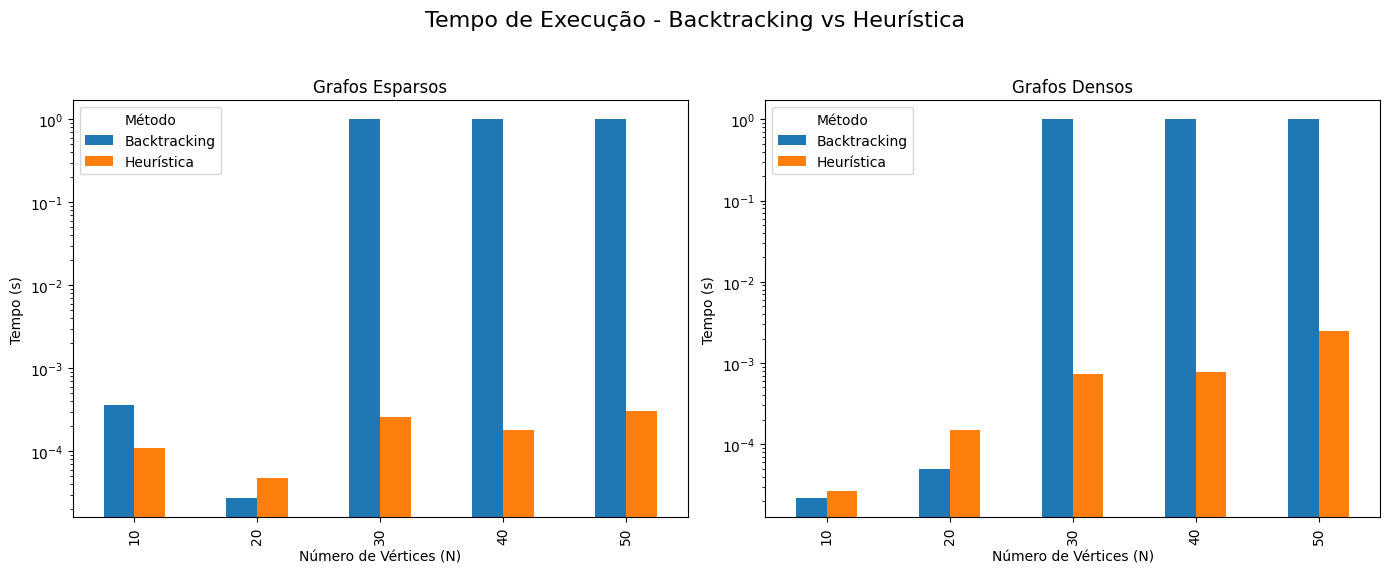

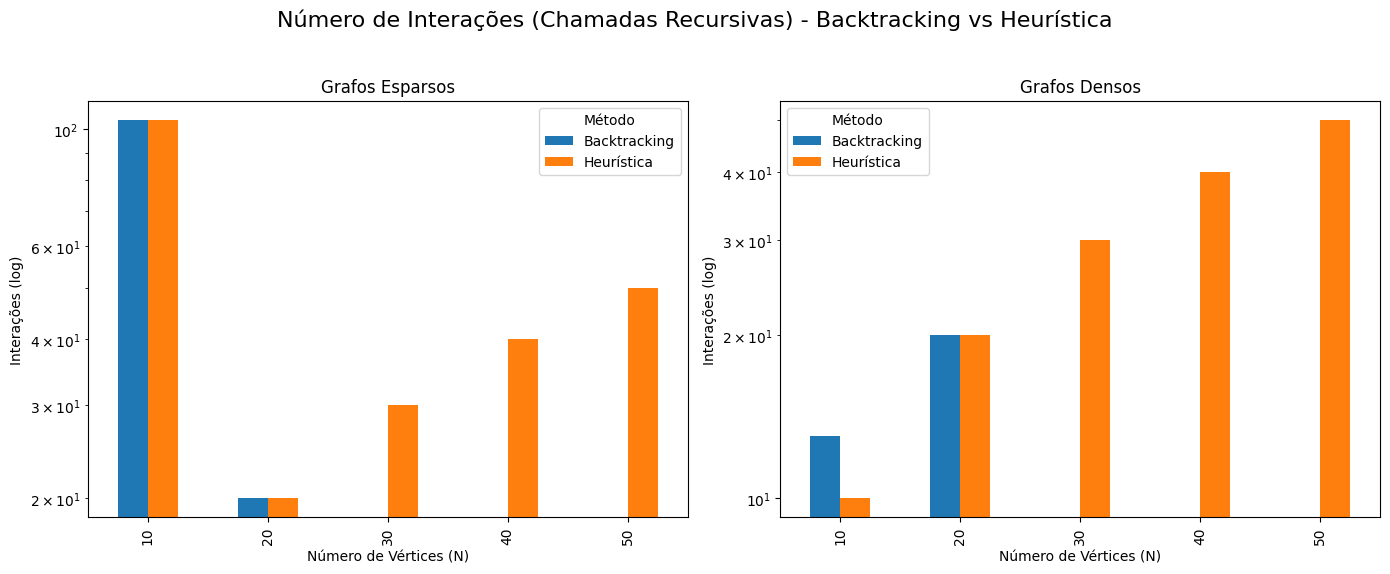

In [3]:
import sys
import time
import random
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

# Configurações
sys.setrecursionlimit(10000)

LIMITE_N_EXATO = 20 # Se N for maior que isso, pula o Backtracking (pois demoraria horas)

# BACKTRACKING (EXATO)
class BacktrackingSolver:
    def __init__(self, n, adj):
        self.n = n
        self.adj = adj
        self.visited = [False] * n
        self.start_time = 0
        self.timeout = 0
        self.timed_out = False
        self.interaction_count = 0 # 1. Initialize interaction counter

    def solve(self, timeout=1.0):
        # PROTEÇÃO: Se N for muito grande, desiste logo para não travar o Colab
        if self.n > LIMITE_N_EXATO:
            # 3. Modify return for skipped cases
            return None, timeout, 0 # Return 0 for interaction count if skipped

        self.start_time = time.time()
        self.timeout = timeout
        self.timed_out = False
        self.interaction_count = 0 # Reset counter for each solve call

        for start_node in range(self.n):
            if self.timed_out or (time.time() - self.start_time > self.timeout):
                # 3. Modify return for timed out cases
                return None, self.timeout, self.interaction_count

            self.visited = [False] * self.n
            self.visited[start_node] = True

            if self.backtrack(start_node, 1):
                # 3. Modify return for successful cases
                return True, time.time() - self.start_time, self.interaction_count

        # 3. Modify return for unsuccessful cases
        return False, time.time() - self.start_time, self.interaction_count

    def backtrack(self, u, count):
        self.interaction_count += 1 # 2. Increment interaction counter

        # Checa o relógio a cada 50 passos (muito frequente para parar rápido)
        if count % 50 == 0:
            if time.time() - self.start_time > self.timeout:
                self.timed_out = True
                return False

        if self.timed_out: return False

        if count == self.n: return True

        # Ordena vizinhos pelo grau (pequena otimização)
        vizinhos = sorted(self.adj[u], key=lambda x: len(self.adj[x]))

        for v in vizinhos:
            if not self.visited[v]:
                self.visited[v] = True
                if self.backtrack(v, count + 1): return True
                self.visited[v] = False
                if self.timed_out: return False
        return False

# 2. HEURÍSTICA (GULOSA)

class HeuristicSolver:
    def __init__(self, n, adj):
        self.n = n
        self.adj = adj
        self.visited = [False] * n
        self.interaction_count = 0 # 1. Add interaction counter

    def solve(self):
        start_time = time.time()
        self.interaction_count = 0 # 2. Reset counter

        # Ordena vértices iniciais pelos mais restritos
        degrees = sorted([(len(self.adj[i]), i) for i in range(self.n)])

        for _, start_node in degrees:
            self.visited = [False] * self.n
            self.visited[start_node] = True
            if self.greedy_dfs(start_node, 1):
                return True, time.time() - start_time, self.interaction_count # 2. Return interaction count
        return False, time.time() - start_time, self.interaction_count # 2. Return interaction count

    def greedy_dfs(self, u, count):
        self.interaction_count += 1 # 3. Increment interaction counter

        if count == self.n: return True

        # Escolhe vizinho com menor grau livre (Warnsdorff's rule)
        candidates = []
        for v in self.adj[u]:
            if not self.visited[v]:
                grau = sum(1 for w in self.adj[v] if not self.visited[w])
                candidates.append((grau, v))

        candidates.sort()

        for _, v in candidates:
            if self.visited[v]: continue # This should not happen if candidates are properly filtered
            self.visited[v] = True
            if self.greedy_dfs(v, count + 1): return True
            self.visited[v] = False
        return False

# 3. EXPERIMENTOS

def rodar_experimentos():
    # Tamanhos solicitados no trabalho
    tamanhos = [10, 20, 30, 40, 50]
    densidades = [("Esparso", 0.2), ("Denso", 0.6)]
    resultados = []

    print(f"{'Cenário':<10} | {'N':<3} | {'Método':<12} | {'Tempo (s)':<10} | {'Interações':<12} | {'Status'}")
    print("-" * 80)

    for nome_densidade, prob in densidades:
        for n in tamanhos:
            # 1. Gerar Grafo
            G = nx.erdos_renyi_graph(n, prob)
            adj = {i: [] for i in range(n)}
            m = 0
            for u, v in G.edges():
                adj[u].append(v)
                adj[v].append(u)
                m += 1

            # 2. Testar Backtracking (Com limite de N)
            solver_bt = BacktrackingSolver(n, adj)
            # Update here to receive interaction_count
            res_bt, t_bt, inter_bt = solver_bt.solve(timeout=1.0) # Max 1 segundo

            # Se res_bt for None, significa Timeout ou Skipped
            status_bt = "SIM" if res_bt is True else ("TIMEOUT/SKIP" if res_bt is None else "NÃO")

            resultados.append({
                "Tipo": nome_densidade, "N": n, "Método": "Backtracking",
                "Tempo": t_bt, "Interacoes": inter_bt, "Status": status_bt
            })
            print(f"{nome_densidade:<10} | {n:<3} | Exact(BT)    | {t_bt:.5f}      | {inter_bt:<12} | {status_bt}")

            # 3. Testar Heurística (Sempre roda)
            solver_heu = HeuristicSolver(n, adj)
            res_heu, t_heu, inter_heu = solver_heu.solve() # 4. Capturar quantidade de interações
            status_heu = "SIM" if res_heu else "NÃO"

            resultados.append({
                "Tipo": nome_densidade, "N": n, "Método": "Heurística",
                "Tempo": t_heu, "Interacoes": inter_heu, "Status": status_heu # 5. Usar atual quantidade de interações
            })
            print(f"{nome_densidade:<10} | {n:<3} | Heuristic    | {t_heu:.5f}      | {inter_heu:<12} | {status_heu}") # 6. Mostrar quantidade atual de interações

    return pd.DataFrame(resultados)


# 4. EXIBIR RESULTADOS

df = rodar_experimentos()

print("\n=== TABELA FINAL PARA O RELATÓRIO ===")
print(df)

# Gráficos de Tempo
fig_time, axes_time = plt.subplots(1, 2, figsize=(14, 6))
fig_time.suptitle('Tempo de Execução - Backtracking vs Heurística', fontsize=16)

for i, (tipo, ax) in enumerate(zip(["Esparso", "Denso"], axes_time)):
    dados = df[df["Tipo"] == tipo]
    pivoted = dados.pivot(index="N", columns="Método", values="Tempo")
    pivoted.plot(kind='bar', ax=ax, title=f"Grafos {tipo}s")
    ax.set_ylabel("Tempo (s)")
    ax.set_xlabel("Número de Vértices (N)")
    ax.set_yscale('log') # Log para ver a diferença gigante

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Ajusta layout para evitar sobreposição do título
plt.show()

# Gráficos de Interações
fig_interacoes, axes_interacoes = plt.subplots(1, 2, figsize=(14, 6))
fig_interacoes.suptitle('Número de Interações (Chamadas Recursivas) - Backtracking vs Heurística', fontsize=16)

for i, (tipo, ax) in enumerate(zip(["Esparso", "Denso"], axes_interacoes)):
    dados = df[df["Tipo"] == tipo]
    pivoted_interacoes = dados.pivot(index="N", columns="Método", values="Interacoes")
    pivoted_interacoes.plot(kind='bar', ax=ax, title=f"Grafos {tipo}s")
    ax.set_ylabel("Interações (log)")
    ax.set_xlabel("Número de Vértices (N)")
    ax.set_yscale('log') # Log para ver a diferença gigante

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Ajusta layout para evitar sobreposição do título
plt.show()